                                                                            NOTEBOOK 3: Machine Learning Predictions                                                           

                                                          2nd Machine Learning Project - start2impact - Davide Miglietta

# California Housing: Max House Price Classification

This is the third notebook of the analysis:
* the goal is to create a model, able to individuate if a block presents a median house value equal to the maximum (500001 $).

As explained in the EDA, 500001 $ seems to not to be a real value but a maximum.


For this reason, in this notebook, a binary classification will be performed to individuate if the block is (1) or is not (0) a 'max'.
The results will be combined with the results obtained on notebook 2.

### The original dataset features are:

* **longitude:** block longitude (higher values: farther west)

* **latitude:** block latitude (higher values: farther north)

* **housing_median_agee:** median age of block houses (the higher the value, the older the houses)

* **total_rooms:** total rooms in a block

* **total_bedrooms:** total bedrooms in a block

* **population:** block population

* **households:** total households (a group of people living in a home unit, for example: a family)

* **median_income:** household median income (10,000 US Dollars)

* **ocean_proximity:** house location respect to the ocean (categorical)

* **median_house_value:** median house value (US Dollars) --> **TARGET**

To which have been added:

* **avg_household_size:** average households size

* **bedrooms_per_person:** average bedrooms per person

* **avg_rooms_per_house:** average number of rooms per house
    
* **ratio_dayrooms_bedrooms:** average ratio dayrooms (living, kitchen...) / bedrooms

## Table of contents:
1. [Libraries](#Libraries)


2. [Dataset_import](#Dataset_import)


3. [Dataset_manipulation](#Dataset_manipulation)


4. [Functions_Definition](#Functions_Definition)


5. [ML_Classification](#ML_Classification)
    - [Random_Forest](#Random_Forest)
    - [K-NN_Classification](#K-NN_Classification)
    - [SVM_Classification](#SVM_Classification)
        
    
6. [Conclusions](#Conclusions)

### Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split as split
from sklearn.utils import resample
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import uniform
from scipy.stats import loguniform
from scipy.stats import randint

### Dataset_import

In [2]:
#importing the modified dataset
CH_df = pd.read_csv('CH_df.csv')
print(CH_df.shape)


#class attribution
'''
500001 $ --> 1 (max)
other values --> 0 (not max)
'''
CH_df['median_house_value'] = CH_df['median_house_value'].apply(lambda x: 0 if x < 500001 else 1)

CH_df.head()

(20525, 18)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,avg_household_size,avg_rooms_per_house,ratio_dayrooms_bedrooms,bedrooms_per_person,oc_pr_<1H OCEAN,oc_pr_INLAND,oc_pr_ISLAND,oc_pr_NEAR BAY,oc_pr_NEAR OCEAN,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,2.555556,6.984127,5.821705,0.400621,0,0,0,1,0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,2.109842,6.238137,5.418626,0.460641,0,0,0,1,0,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,2.802260,8.288136,6.721053,0.383065,0,0,0,1,0,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,2.547945,5.817352,4.421277,0.421147,0,0,0,1,0,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,2.181467,6.281853,4.810714,0.495575,0,0,0,1,0,0


### Dataset_manipulation

In [3]:
#print(CH_df.columns.values.tolist(), '\n')

columns = []

columns = [
    
            'longitude', 'latitude',
            #'housing_median_age', 
            #'total_rooms', 'total_bedrooms', 
            #'population', 'households', 
            'median_income',
            'avg_household_size', 'avg_rooms_per_house', 'bedrooms_per_person', 
            'ratio_dayrooms_bedrooms',  
            'oc_pr_<1H OCEAN', 'oc_pr_INLAND', 'oc_pr_ISLAND', 'oc_pr_NEAR BAY', 'oc_pr_NEAR OCEAN', 
            #'median_house_value'
            
            ]

columns

['longitude',
 'latitude',
 'median_income',
 'avg_household_size',
 'avg_rooms_per_house',
 'bedrooms_per_person',
 'ratio_dayrooms_bedrooms',
 'oc_pr_<1H OCEAN',
 'oc_pr_INLAND',
 'oc_pr_ISLAND',
 'oc_pr_NEAR BAY',
 'oc_pr_NEAR OCEAN']

#### Creating a X matrix of the features and a y array of the targets:

In [4]:
X = CH_df[columns].copy()
y = CH_df['median_house_value']

#### Split in Train and Test Set:

IMPORTANT: It is necessary that 'test_size' and 'random_state' are set with the same values of notebook 2. For replicability and to be able to compare/combine the predictions.

In [5]:
X_train, X_test, y_train, y_test = split(X, y, test_size =.2, random_state=0) 

print(X.shape)
print(X_train.shape)
print(X_test.shape)

(20525, 12)
(16420, 12)
(4105, 12)


#### Dataset scaling:

- MinMaxScaler() has been used to mantain '0' and '1' in the 'dummies' columns.

- First it has been performed 'fit_transorm' on the train set. With this, the values for transformation has been obtained an then applied on the test set.


In [6]:
#dataset scaling
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
print(X_train)

X_test = scaler.transform(X_test)
print(X_test)


[[0.24501992 0.50851064 0.12126729 ... 0.         0.         0.        ]
 [0.18924303 0.63404255 0.09959863 ... 0.         0.         0.        ]
 [0.63645418 0.13510638 0.22117626 ... 0.         0.         0.        ]
 ...
 [0.20717131 0.60957447 0.1490945  ... 0.         1.         0.        ]
 [0.64541833 0.12234043 0.30450614 ... 0.         0.         0.        ]
 [0.82669323 0.08297872 0.08477814 ... 0.         0.         0.        ]]
[[0.19123506 0.55744681 0.22805892 ... 0.         1.         0.        ]
 [0.61952191 0.16276596 0.14977035 ... 0.         0.         0.        ]
 [0.5189243  0.20638298 0.5        ... 0.         0.         0.        ]
 ...
 [0.62350598 0.17340426 0.67095626 ... 0.         0.         0.        ]
 [0.51693227 0.1787234  0.15556337 ... 0.         0.         1.        ]
 [0.60956175 0.16808511 0.26132053 ... 0.         0.         0.        ]]


### Functions_Definition

For the following part, two functions have been created in order to be re-used for all the models:
* **random_search():** applying randomized search to find the best hyperparameters
* **see_randomsearch_results():** visualize the obtained results

Some considerations:
* model and parameters are the model and the set of hyperparameters to be tested
* cv is the number of folds for cross-validation
* scoring is the metric that discriminates the parameters
* verbose is set to 50 to have a sense of the ongoing analysis
* a 'model_dict' is created to have all information organized in the same way for all the models

In [7]:
def random_search(model, parameters, k, scoring, N):
       
    rs = RandomizedSearchCV(model, parameters, cv = k, scoring = scoring, n_iter = N, verbose = 50, n_jobs = -1) 
    rs = rs.fit(X_train, y_train)
    
    #'model_dict' is a dictionary containing all results of RandomizedSearchCV() for an easier later consultation
    model_dict = {}
    model_dict['best_score'] = rs.best_score_
    model_dict['best_params'] = rs.best_params_
    
    model_dict['params'] = rs.cv_results_['params']
    model_dict['means'] = rs.cv_results_['mean_test_score']
    model_dict['stds'] = rs.cv_results_['std_test_score']
        
    best_model = rs.best_estimator_
    
    return best_model, model_dict

In [8]:
def see_randomsearch_results(x, model_dict, regr_model):
    
    print('Best Model:', regr_model)
    print('\nBest score ({}): {:.3f}'.format(scoring, model_dict['best_score']))
    
    #to organize in descending order the results of the RandomizedSearchCV()
    #and organize consequently the corresponding standard deviations and list of parameters
    zipped_lists = zip(list(model_dict['means']), list(model_dict['stds']), list(model_dict['params']))
    sorted_lists = sorted(zipped_lists, reverse = True)
    tuples = zip(*sorted_lists)
    sorted_means, sorted_stds, sorted_params = [ list(tuple) for tuple in  tuples]
    
    plt.figure(figsize=(20, 4))
    
    #plot a point corresponding to the score and a bar corresponding to the std dev for each group of parameters
    plt.errorbar(x, sorted_means, yerr=sorted_stds, fmt='o')
    plt.xticks(x)
    
    plt.show()

    print('Chart Legend:\n')
    
    for i in x:
        print('{} --> Hyperparameters: {}'.format(i, sorted_params[i]))

In [9]:
k = 10 #k-folds for cross validation

scoring = 'f1' #f1 is the chosen metric (combines precision and recall)
#F1 = 2 * (precision * recall) / (precision + recall)

N = 20 #number of iterations (combination of hyperparameters)
x = list(np.arange(0,N)) #for plotting

### ML_Classification

**Before starting with the classification, some observations regarding the objective.**

The goal is to find if a block corresponds to a maximum. Also, this is not the only prediction of the analysis: regression is also performed to find continuos values for the target.

Ideally, the pipeline of our system should be:
- analyze sample --> is it a max?
    * yes: assign max
    * no: calculate the value with regression


#### Best metric
In this context, the **most important metric for classification is precision**. It is important that, if the classifier individuates a '1', this is actually correct. A **False Positve** means assigning a maximum value of houses when it is not supposed to be, and that's a problem.

This is even worst if, as introduced, the analysis of a sample starts with the classification and stops if the result is 1. 

A non completely satisfactory precision could be mitigated if:
on a sample are performed, in any case, both regression and classification. If classification individuates a max, than the average between the two predictions is performed (500001 and regr_predicion).


#### Other metrics
- Recall (sensibility) should be above a certain treshold: meaning that the classification is able to individuate a certain fraction of ones. Let's say it is 0.5: it means that the classifier is able to individuate half of the ones. This combined with a high precision, could be satisfactory. 
Of course, the higher the better; however, it is not so important to get a very high value (close to 1) because regression could "fix" the presence of **False Negatives**.


- Accuracy combines "all correct predictions" / "all values". In this situation is not of interest beacuse of:
    * the reasons explained above: a False Positive is worst than a False Negative.
    * the disproprtion of zeros and ones. For example, considering that (more or less) zeros are 96 % and ones are 4 % of the dataset: a model that predict all zeros would have an accuracy of 96 %, but completely miss the point of the classification

#### Classes disproportion

There is a big disproprtion between zeros and ones. This could make more difficult the individuation of ones.

To overcome this problem, it is set: **class_weight='balanced' for random forest and support vector machine**

#### Random_Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(class_weight='balanced')

parameters = {'n_estimators': [200, 300],
              'max_features': uniform(0.07, 0.5),
             #'min_samples_split': loguniform(0.0001,0.01),
              'min_samples_leaf':loguniform(0.0001,0.01)
             }


RF_classifier, RF_dict = random_search(classifier, parameters, k, scoring, N)

RF_predictions = RF_classifier.predict(X_test)

print('\nDone!')

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   34.5s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   34.7s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   35.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   35.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   51.8s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   51.8s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   55.1s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   55.4s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  

[Parallel(n_jobs=-1)]: Done 131 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 145 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  6.2min
[Paralle

Best Model: RandomForestClassifier(class_weight='balanced',
                       max_features=0.19808145687433382,
                       min_samples_leaf=0.00019739008068922373,
                       n_estimators=200)

Best score (f1): 0.691


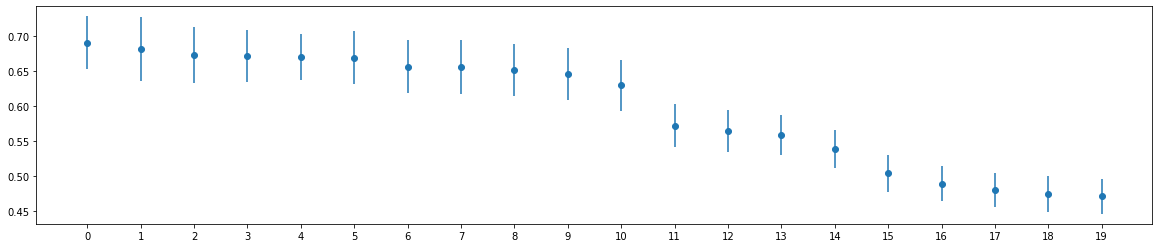

Chart Legend:

0 --> Hyperparameters: {'max_features': 0.19808145687433382, 'min_samples_leaf': 0.00019739008068922373, 'n_estimators': 200}
1 --> Hyperparameters: {'max_features': 0.2821252848599311, 'min_samples_leaf': 0.0001654328910187992, 'n_estimators': 300}
2 --> Hyperparameters: {'max_features': 0.25728123868233344, 'min_samples_leaf': 0.0001118693149121655, 'n_estimators': 300}
3 --> Hyperparameters: {'max_features': 0.5281703319116621, 'min_samples_leaf': 0.0001384868184657441, 'n_estimators': 300}
4 --> Hyperparameters: {'max_features': 0.5299715920110402, 'min_samples_leaf': 0.00027385952668467585, 'n_estimators': 200}
5 --> Hyperparameters: {'max_features': 0.44292108339886266, 'min_samples_leaf': 0.00030355471480725623, 'n_estimators': 200}
6 --> Hyperparameters: {'max_features': 0.4770184415941134, 'min_samples_leaf': 0.0003769708883237453, 'n_estimators': 200}
7 --> Hyperparameters: {'max_features': 0.2322954068295624, 'min_samples_leaf': 0.000400621831433725, 'n_estima

In [11]:
see_randomsearch_results(x, RF_dict, RF_classifier)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3919
           1       0.61      0.70      0.65       186

    accuracy                           0.97      4105
   macro avg       0.80      0.84      0.82      4105
weighted avg       0.97      0.97      0.97      4105



Text(33.0, 0.5, 'Actual Values')

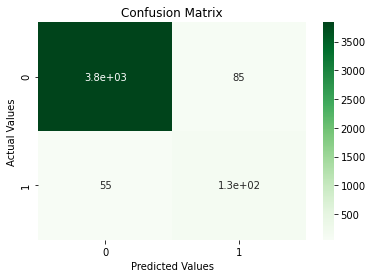

In [12]:
#printing classification report
print(classification_report(y_test, RF_predictions))

# plot confusion matrix with predictions on test set
sns.heatmap(confusion_matrix(y_test, RF_predictions), annot=True, cmap="Greens")

plt.title('Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

As said before, the two metrics to evaluate are precision and recall (both referred to '1'):

* precision = 0.61 is too low
* recall = 0.70 could be accetable

In general, due to poor precision, this model is not satisfactory.

#### K-NN_Classification

In [13]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()

K_min = round(CH_df.shape[0] * 0.0005)
K_max = round(CH_df.shape[0] * 0.01)

parameters = {'n_neighbors': randint(K_min, K_max)}

KNN_classifier, KNN_dict = random_search(classifier, parameters, k, scoring, N)

KNN_predictions = KNN_classifier.predict(X_test)

print('\nDone!')

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  

[Parallel(n_jobs=-1)]: Done 131 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed:   24.7s
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done 145 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   27.1s
[Paralle

Best Model: KNeighborsClassifier(n_neighbors=19)

Best score (f1): 0.563


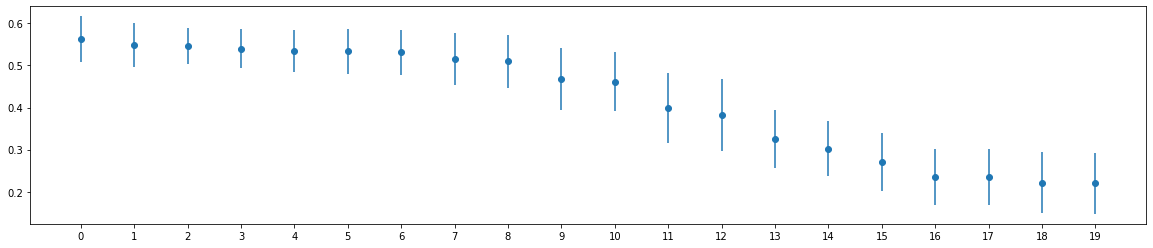

Chart Legend:

0 --> Hyperparameters: {'n_neighbors': 19}
1 --> Hyperparameters: {'n_neighbors': 26}
2 --> Hyperparameters: {'n_neighbors': 33}
3 --> Hyperparameters: {'n_neighbors': 31}
4 --> Hyperparameters: {'n_neighbors': 30}
5 --> Hyperparameters: {'n_neighbors': 34}
6 --> Hyperparameters: {'n_neighbors': 41}
7 --> Hyperparameters: {'n_neighbors': 47}
8 --> Hyperparameters: {'n_neighbors': 46}
9 --> Hyperparameters: {'n_neighbors': 64}
10 --> Hyperparameters: {'n_neighbors': 66}
11 --> Hyperparameters: {'n_neighbors': 87}
12 --> Hyperparameters: {'n_neighbors': 90}
13 --> Hyperparameters: {'n_neighbors': 104}
14 --> Hyperparameters: {'n_neighbors': 111}
15 --> Hyperparameters: {'n_neighbors': 120}
16 --> Hyperparameters: {'n_neighbors': 161}
17 --> Hyperparameters: {'n_neighbors': 161}
18 --> Hyperparameters: {'n_neighbors': 193}
19 --> Hyperparameters: {'n_neighbors': 195}


In [14]:
see_randomsearch_results(x, KNN_dict, KNN_classifier)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3919
           1       0.80      0.45      0.58       186

    accuracy                           0.97      4105
   macro avg       0.89      0.72      0.78      4105
weighted avg       0.97      0.97      0.97      4105



Text(33.0, 0.5, 'Actual Values')

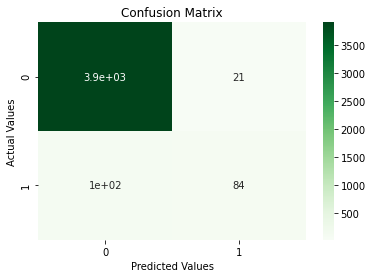

In [15]:

#printing classification report
print(classification_report(y_test, KNN_predictions))

# plot confusion matrix with predictions on test set
sns.heatmap(confusion_matrix(y_test, KNN_predictions), annot=True, cmap="Greens")

plt.title('Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

Compared to Random Forest: there was a slight improvement in precision but a decrease in sensitivity.
Still the model is not satisfactory.

#### SVM_Classification

In [16]:
from sklearn.svm import SVC

classifier = SVC()

C_range = loguniform(1e-3, 1e3)
gamma_range = loguniform(1e-3, 1e3)
degree_range = np.arange(2,5)

parameters = [
                {'kernel' : ['linear'], 'C' : C_range},
                {'kernel' : ['rbf'], 'C' : C_range, 'gamma' : gamma_range},
                {'kernel' : ['poly'], 'C' : C_range, 'degree' : degree_range}
                
             ]


SVC_classifier, SVC_dict = random_search(classifier, parameters, k, scoring, N)

SVC_predictions = SVC_classifier.predict(X_test)

print('\nDone!')

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  

[Parallel(n_jobs=-1)]: Done 131 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 145 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.7min
[Paralle

In [17]:
#see_randomsearch_results(x, SVC_dict, SVC_classifier)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3919
           1       0.82      0.44      0.57       186

    accuracy                           0.97      4105
   macro avg       0.90      0.72      0.78      4105
weighted avg       0.97      0.97      0.97      4105



Text(33.0, 0.5, 'Actual Values')

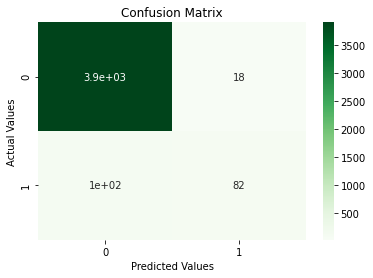

In [18]:
#printing classification report
print(classification_report(y_test, SVC_predictions))

# plot confusion matrix with predictions on test set
sns.heatmap(confusion_matrix(y_test, SVC_predictions), annot=True, cmap="Greens")

plt.title('Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In this case:
* precision has the highest value of the three (0.82)
* recall is poor (0.44)

Due to the considerations done before abot the importance of precision: this could be considered as the best of three models. However, performance is not really satisfactory.

### Conclusions

Predictions from the SVC model are saved in a csv file and used back in notebook 2.

In [19]:
np.savetxt('y_test_classification.csv', SVC_predictions, delimiter = ',')